# CS471: Introduction to Artificial Intelligence 
## Assignment 5

You can do this assignment either individually or in a group of two. Use Google Colab for your code, plots, and comments. When you finish editing, re-run all the cells to make sure they work. 
--------------------------------------------------------------------------------------------------------------------- 
In recent years, distributed energy resources such as solar and wind power stations present havoc to the distribution portion of the grid. The intermittent fluctuations of power coming from the generation source creates power quality issues and instability challenges, which make the possibility of system failures more frequent and causes extensive damage to the power system infrastructure. To tackle this issue, optimizing wind turbine performance is essential, and the analysis of current wave data is crucial. Accurate identification of oscillatory signals within this data is challenging but vital, as these signals indicate operational concerns. 
In this assignment, you will work with this wind farm dataset. 

You can download the dataset from here: Train and Test. The starter code for the assignment can be accessed from here. 

There are two classes, one being a normal class and the other being an oscillation class. The goal is to perform classification using any machine learning algorithm of your choice. You can use the Scikit-learn toolbox to develop your models. 

1. Describe what is a binary classification and multi-class classification problem and specify if the current problem is a binary or a multi-class one. (1 point)
2. Perform pre-processing if necessary. (2 points) 
3. Fit a machine learning algorithm of your choice on the training dataset. (1 point)
4. Explain the reason behind selection of machine learning algorithm (2 points)
5. Tune hyperparameters (if any) based on the performance on the validation set or using cross-validation. Plot the hyperparameter value on the x-axis and performance metric on the y-axis. (2 points)  
6. Evaluate it on test data and generate a classification report (2 points)


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
training_data = pd.read_csv("training.csv", header=None, usecols=[19,23], names=['Time','Current'])
test_data = pd.read_csv("test.csv", header=None, usecols=[0, 4], names=['Time','Current'])

In [3]:
training_data

,Time,Current
0,0.00000,-0.807514
1,0.00005,-0.806968
2,0.00010,-0.806291
3,0.00015,-0.804651
4,0.00020,-0.801798
...,...,...
299996,14.99980,-0.979724
299997,14.99985,-0.954137
299998,14.99990,-0.927560
299999,14.99995,-0.900309


In [4]:
test_data

,Time,Current
0,0.00000,-0.807514
1,0.00005,-0.806968
2,0.00010,-0.806291
3,0.00015,-0.804651
4,0.00020,-0.801798
...,...,...
119996,5.99980,-0.596946
119997,5.99985,-0.579137
119998,5.99990,-0.556793
119999,5.99995,-0.528649


In [5]:
training_data = training_data[training_data['Time'] <= 5.4]
test_data = test_data[test_data['Time'] <= 2.4]

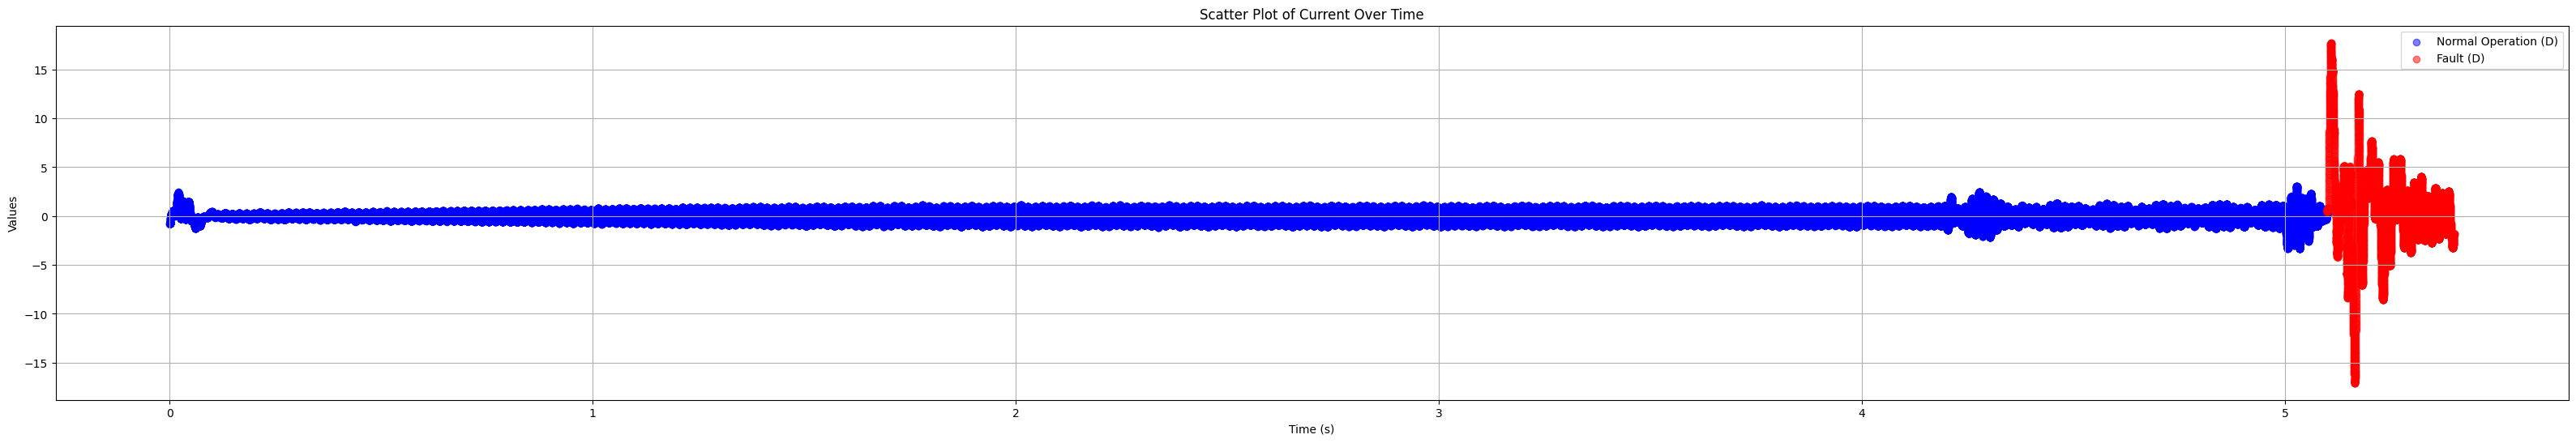

In [6]:
import matplotlib.pyplot as plt

df = training_data
fault_start = 5.1
fault_end = 5.4
# Separate the data points
fault_data = df[(df['Time'] >= fault_start) & (df['Time'] <= fault_end)]
normal_data = df[(df['Time'] < fault_start) | (df['Time'] > fault_end)]

plt.figure(figsize=(40, 6))

# Plotting for column D
plt.scatter(normal_data['Time'], normal_data['Current'], c='blue', label='Normal Operation (D)', alpha=0.5)
plt.scatter(fault_data['Time'], fault_data['Current'], c='red', label='Fault (D)', alpha=0.5)


plt.title('Scatter Plot of Current Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

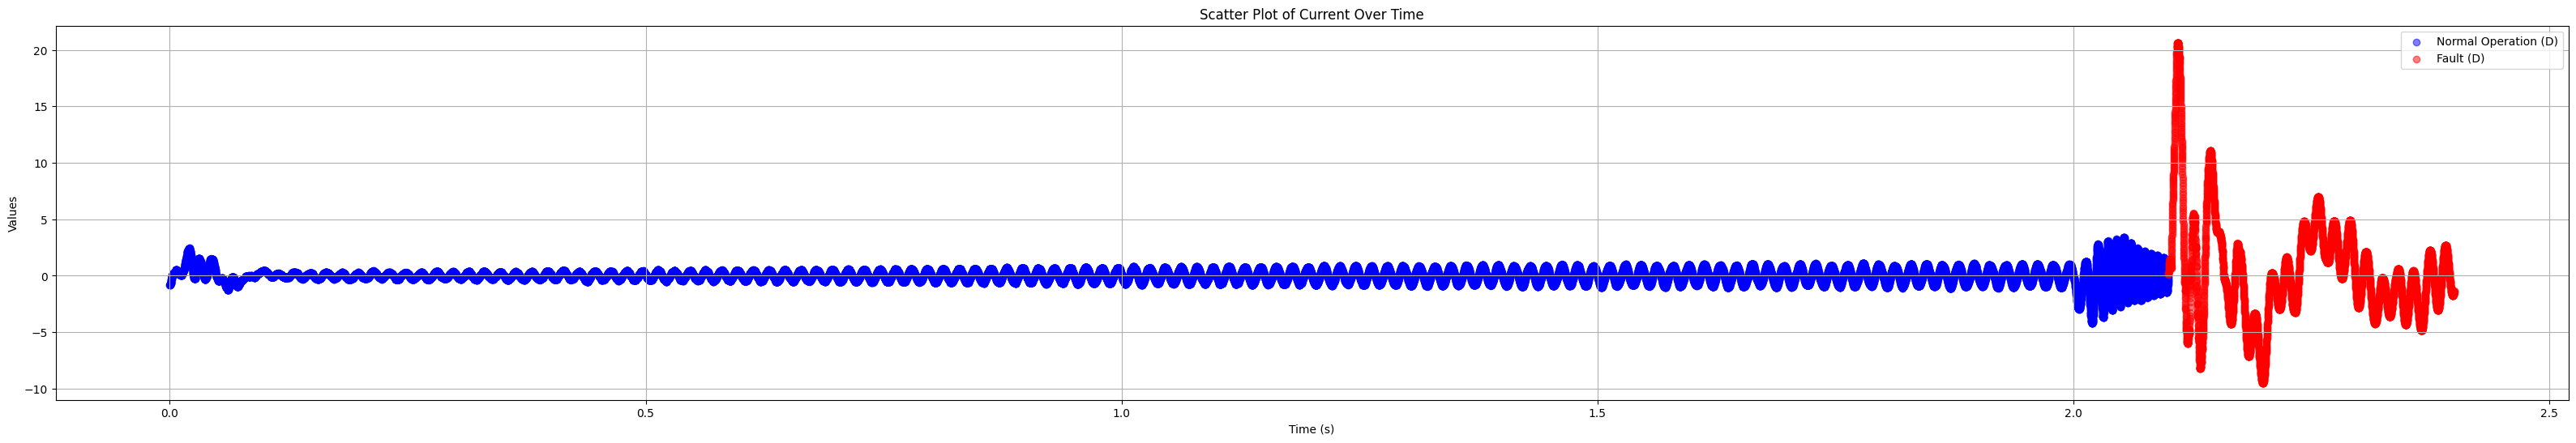

In [7]:
import matplotlib.pyplot as plt

df = test_data
fault_start = 2.1
fault_end = 2.4
# Separate the data points
fault_data = df[(df['Time'] >= fault_start) & (df['Time'] <= fault_end)]
normal_data = df[(df['Time'] < fault_start) | (df['Time'] > fault_end)]

plt.figure(figsize=(40, 6))

# Plotting for column D
plt.scatter(normal_data['Time'], normal_data['Current'], c='blue', label='Normal Operation (D)', alpha=0.5)
plt.scatter(fault_data['Time'], fault_data['Current'], c='red', label='Fault (D)', alpha=0.5)


plt.title('Scatter Plot of Current Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Define segmenting and labeling function

def segment_labeling(data, window, overlap, time1, time2):

  # Define the number of data points per segment = window size

  #index determines the start of a window
  #in each step of segmenting loop
  index = 0

  #windolap incorporates overlaping percentage
  windolap = math.floor (window * overlap)

  # Create an empty DataFrame for storing the labels
  labels_df = pd.DataFrame(columns=['label'])

  time_series = []

  while (index + window) < len(data):
      # Extract a segment of data
      segment = data.iloc[index : (index+window)]

      # Labeling based on a given time (the oscillation time is given)
      if any((time1 <= t <= time2) for t in segment['Time']):
        label = 'oscillation'
      else:
        label = 'normal'

      time_series.append(segment['Current'])

      # Append the label to the labels DataFrame
      labels_df = pd.concat([labels_df, pd.DataFrame({'label': [label]})], ignore_index=True)

      #Shifting the index forward by stride = window - windolap
      index += window - windolap

  # return lables_df as a DataFrame
  return time_series, labels_df

In [9]:
window = 200
overlap = 0.75

train_X, train_y = segment_labeling(training_data, window, overlap, 5.1, 5.4)
test_X, test_y = segment_labeling(test_data, window, overlap, 2.1, 2.4)

In [10]:
train_y.value_counts()

label      
normal         2037
oscillation     120
Name: count, dtype: int64

In [11]:
test_y.value_counts()

label      
normal         837
oscillation    120
Name: count, dtype: int64

In [12]:
X_train = np.array(train_X)
X_test = np.array(test_X)

In [13]:
print(X_train.shape)
print(X_test.shape)

(2157, 200)
(957, 200)


In [14]:
#Checking for null values

print("Missing Values in Training Data:")
print(training_data.isnull().sum())
print("Missing Values in Testing Data:")
print(test_data.isnull().sum())

Missing Values in Training Data:
Time       0
Current    0
dtype: int64
Missing Values in Testing Data:
Time       0
Current    0
dtype: int64


In [ ]:
# Encode labels and scale the features
le = preprocessing.LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

scaler=preprocessing.StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

Training data shape: (2157, 200)
Test data shape: (957, 200)


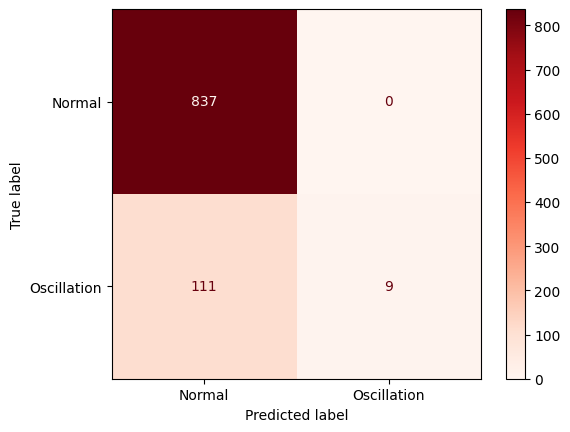

Confusion matrix
[[837   0]
 [111   9]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94       837
 Oscillation       1.00      0.07      0.14       120

    accuracy                           0.88       957
   macro avg       0.94      0.54      0.54       957
weighted avg       0.90      0.88      0.84       957



In [ ]:
# Training a logistic regression model and evaluating it
lr=LogisticRegression()
lr.fit(X_train_s,train_y)
y_pred = lr.predict(X_test_s)

# Display confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
disp=metrics.ConfusionMatrixDisplay(cnf_matrix,display_labels=['Normal', 'Oscillation'])
disp.plot(cmap='Reds')
plt.show()
print('Confusion matrix')
print(cnf_matrix)

# Print classification report
print("\nClassification Report:")
print(metrics.classification_report(test_y, y_pred, target_names=['Normal', 'Oscillation']))

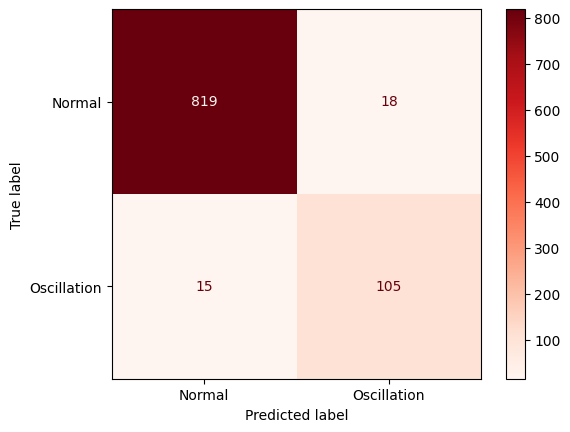


Classification Report:
              precision    recall  f1-score   support

      Normal       0.98      0.98      0.98       837
 Oscillation       0.85      0.88      0.86       120

    accuracy                           0.97       957
   macro avg       0.92      0.93      0.92       957
weighted avg       0.97      0.97      0.97       957



In [ ]:
# Training a non-linear SVM model and evaluating it
from sklearn.svm import SVC

svm_clf=SVC(kernel='rbf',gamma='scale',C=1)
svm_clf.fit(X_train_s,train_y)

y_pred = svm_clf.predict(X_test_s)

# Display confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
disp=metrics.ConfusionMatrixDisplay(cnf_matrix,display_labels=['Normal', 'Oscillation'])
disp.plot(cmap='Reds')
plt.show()

# Print classification report
print("\nClassification Report:")
print(metrics.classification_report(test_y, y_pred, target_names=['Normal', 'Oscillation']))

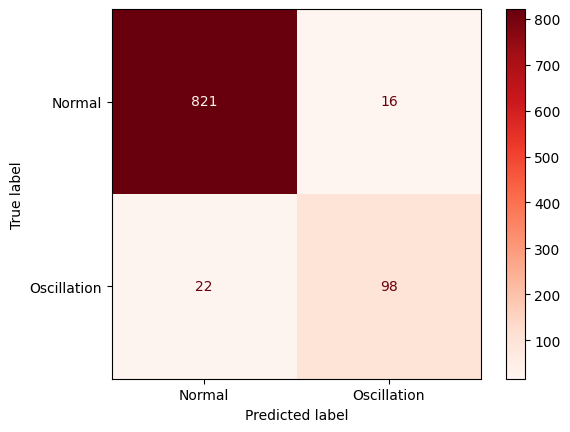


Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98       837
 Oscillation       0.86      0.82      0.84       120

    accuracy                           0.96       957
   macro avg       0.92      0.90      0.91       957
weighted avg       0.96      0.96      0.96       957



In [ ]:
# Training a Random Forest model and evaluating it
from sklearn.ensemble import RandomForestClassifier

rnd_clf=RandomForestClassifier()
rnd_clf.fit(X_train_s,train_y)

y_pred = rnd_clf.predict(X_test_s)

# Display confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
disp=metrics.ConfusionMatrixDisplay(cnf_matrix,display_labels=['Normal', 'Oscillation'])
disp.plot(cmap='Reds')
plt.show()

# Print classification report
print("\nClassification Report:")
print(metrics.classification_report(test_y, y_pred, target_names=['Normal', 'Oscillation']))

Non-Linear SVM was best so we will choose that algorithm

In [ ]:
from sklearn.model_selection import GridSearchCV

#every parameter we are testing in our Cross-validation
param_grid = {'C': [0.1, 1, 10, 100 ],  
              'gamma': ['scale','auto', 1, 0.1, 0.01, 0.001], 
              'kernel': ['rbf','linear'],
              }
 
svm = SVC(random_state=15, probability=True)
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',  # The metric we are scoring on
    refit=True,
    verbose=2,
    n_jobs=-1  # Use all available cores
)
grid_search.fit(X_train_s, train_y)

print("\nBest parameters found:")
print(grid_search.best_params_)
print("\nBest cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best parameters found:
{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

Best cross-validation accuracy: 0.985


Text(0.5, 1.0, 'Grid Search Accuracy for Different C and Gamma Values')

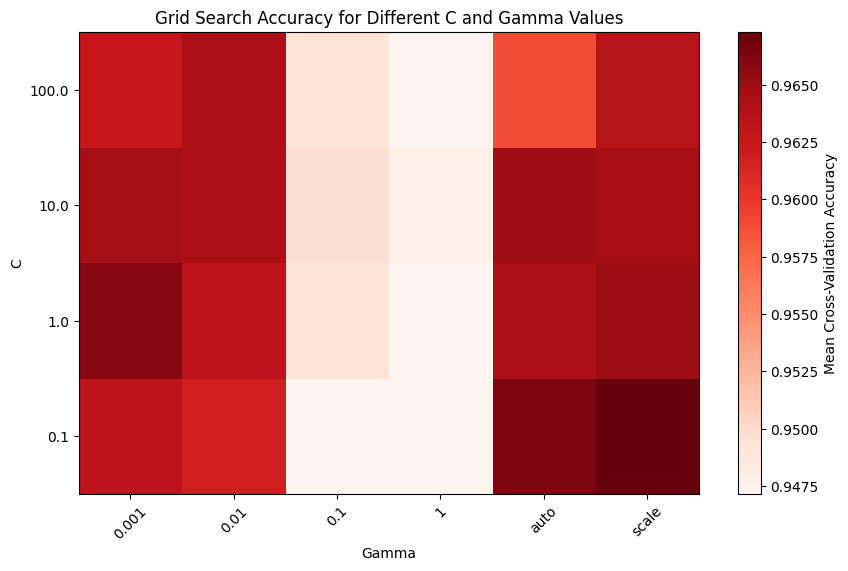

In [ ]:
# Visualizing grid search results
results_df=pd.DataFrame(grid_search.cv_results_)
pivot_table = pd.pivot_table(
    results_df,
    values='mean_test_score',
    index='param_C',
    columns='param_gamma',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
heatmap = plt.imshow(pivot_table, cmap="Reds", origin='lower', aspect='auto')

plt.colorbar(heatmap, label='Mean Cross-Validation Accuracy')
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns, rotation=45)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Accuracy for Different C and Gamma Values')


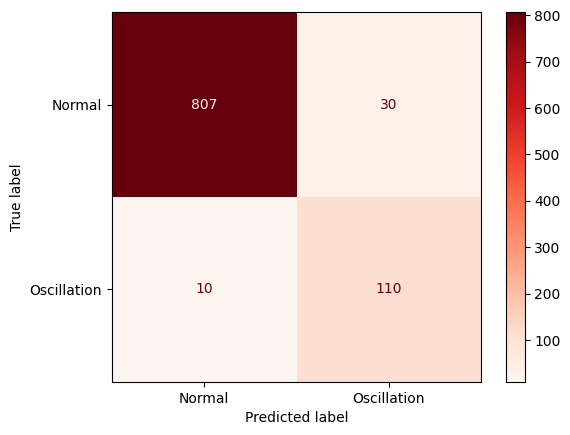


Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.96      0.98       837
 Oscillation       0.79      0.92      0.85       120

    accuracy                           0.96       957
   macro avg       0.89      0.94      0.91       957
weighted avg       0.96      0.96      0.96       957



In [ ]:
# Final model evaluation using best SVM and displaying classification report and confusion matrix
best_svm=grid_search.best_estimator_
y_pred=best_svm.predict(X_test_s)

cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
disp=metrics.ConfusionMatrixDisplay(cnf_matrix,display_labels=['Normal', 'Oscillation'])
disp.plot(cmap='Reds')
plt.show()


print("\nClassification Report:")
print(metrics.classification_report(test_y, y_pred, target_names=['Normal', 'Oscillation']))